# Deep Learning - MVA: Mini Project 1
## Dimitri Bouche (dimitri.bouche@ensae.fr)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

# Keras imports
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, AveragePooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

# Local import
import mp1
importlib.reload(mp1)

<module 'mp1' from '/home/dimitribouche/Bureau/MVA/S1/DL/TP1/mp1.py'>

# 2. Simple classification
## Generate the dataset and vizualize and few data points

In [2]:
# Generate train set
[X_train, Y_train] = mp1.generate_dataset_classification(300, 20)

# Encode the label in "One hot encoding"
Y_train_onehot = (np_utils.to_categorical(Y_train)).astype(int)

#G et dimensions
d = X_train.shape[1]
ntrain = X_train.shape[0]
# Sizes of non flattened images
d_sqrt = int(np.sqrt(d))

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


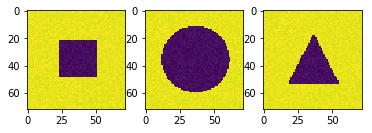

In [3]:
# Plot a data point for each class
rect = X_train[np.argwhere(Y_train == 0)[0], :].reshape((d_sqrt, d_sqrt))
circ = X_train[np.argwhere(Y_train == 1)[0], :].reshape((d_sqrt, d_sqrt))
tria = X_train[np.argwhere(Y_train == 2)[0], :].reshape((d_sqrt, d_sqrt))
fig, ax = plt.subplots(ncols=3)
ax[0].imshow(rect)
ax[1].imshow(circ)
ax[2].imshow(tria)

## Linear probabilities model with softmax activation for classification

### Model architecture

In [4]:
# Create empty sequential model
model = Sequential()

# Add the first (and last) layer for linear classification
model.add(Dense(units=3, input_shape=(d, )))

# Add activation function for this layer
# We are using a linear probability model very much like the logistic regression
# Softmax ensures that our probabilities stay within the [0, 1] range
model.add(Activation("softmax"))

### Model training

In [5]:
# Stochastic gradient descent optimizer
# sgd = SGD(lr=0.01,
#           decay=1e-6,
#           momentum=0.9,
#           nesterov=True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


# Fit the model with SGD optimizer
epochs = 1000
batch_size = 32
history = model.fit(X_train, Y_train_onehot, epochs=epochs, batch_size=batch_size)

Epoch 1/1000
300/300 [==============================] - 0s 536us/step - loss: 1.9120 - acc: 0.3867
Epoch 2/1000
300/300 [==============================] - 0s 105us/step - loss: 1.0423 - acc: 0.5700
Epoch 3/1000
300/300 [==============================] - 0s 106us/step - loss: 0.5414 - acc: 0.7433
Epoch 4/1000
300/300 [==============================] - 0s 128us/step - loss: 0.4431 - acc: 0.7800
Epoch 5/1000
300/300 [==============================] - 0s 121us/step - loss: 0.3079 - acc: 0.8867
Epoch 6/1000
300/300 [==============================] - 0s 136us/step - loss: 0.2421 - acc: 0.9300
Epoch 7/1000
300/300 [==============================] - 0s 149us/step - loss: 0.2381 - acc: 0.9100
Epoch 8/1000
300/300 [==============================] - 0s 117us/step - loss: 0.1824 - acc: 0.9833
Epoch 9/1000
300/300 [==============================] - 0s 133us/step - loss: 0.1648 - acc: 0.9800
Epoch 10/1000
300/300 [==============================] - 0s 114us/step - loss: 0.1506 - acc: 0.9933
Epoch 11/

300/300 [==============================] - 0s 93us/step - loss: 0.0079 - acc: 1.0000
Epoch 84/1000
300/300 [==============================] - 0s 87us/step - loss: 0.0078 - acc: 1.0000
Epoch 85/1000
300/300 [==============================] - 0s 106us/step - loss: 0.0076 - acc: 1.0000
Epoch 86/1000
300/300 [==============================] - 0s 98us/step - loss: 0.0076 - acc: 1.0000
Epoch 87/1000
300/300 [==============================] - 0s 89us/step - loss: 0.0076 - acc: 1.0000
Epoch 88/1000
300/300 [==============================] - 0s 95us/step - loss: 0.0072 - acc: 1.0000
Epoch 89/1000
300/300 [==============================] - 0s 91us/step - loss: 0.0073 - acc: 1.0000
Epoch 90/1000
300/300 [==============================] - 0s 91us/step - loss: 0.0075 - acc: 1.0000
Epoch 91/1000
300/300 [==============================] - 0s 94us/step - loss: 0.0071 - acc: 1.0000
Epoch 92/1000
300/300 [==============================] - 0s 79us/step - loss: 0.0072 - acc: 1.0000
Epoch 93/1000
300/300 [

300/300 [==============================] - 0s 82us/step - loss: 0.0026 - acc: 1.0000
Epoch 165/1000
300/300 [==============================] - 0s 86us/step - loss: 0.0025 - acc: 1.0000
Epoch 166/1000
300/300 [==============================] - 0s 91us/step - loss: 0.0025 - acc: 1.0000
Epoch 167/1000
300/300 [==============================] - 0s 89us/step - loss: 0.0025 - acc: 1.0000
Epoch 168/1000
300/300 [==============================] - 0s 104us/step - loss: 0.0024 - acc: 1.0000
Epoch 169/1000
300/300 [==============================] - 0s 94us/step - loss: 0.0024 - acc: 1.0000
Epoch 170/1000
300/300 [==============================] - 0s 89us/step - loss: 0.0024 - acc: 1.0000
Epoch 171/1000
300/300 [==============================] - 0s 96us/step - loss: 0.0024 - acc: 1.0000
Epoch 172/1000
300/300 [==============================] - 0s 99us/step - loss: 0.0024 - acc: 1.0000
Epoch 173/1000
300/300 [==============================] - 0s 84us/step - loss: 0.0025 - acc: 1.0000
Epoch 174/1000

300/300 [==============================] - 0s 105us/step - loss: 0.0012 - acc: 1.0000
Epoch 246/1000
300/300 [==============================] - 0s 115us/step - loss: 0.0012 - acc: 1.0000
Epoch 247/1000
300/300 [==============================] - 0s 111us/step - loss: 0.0012 - acc: 1.0000
Epoch 248/1000
300/300 [==============================] - 0s 110us/step - loss: 0.0012 - acc: 1.0000
Epoch 249/1000
300/300 [==============================] - 0s 110us/step - loss: 0.0012 - acc: 1.0000
Epoch 250/1000
300/300 [==============================] - 0s 93us/step - loss: 0.0012 - acc: 1.0000
Epoch 251/1000
300/300 [==============================] - 0s 106us/step - loss: 0.0012 - acc: 1.0000
Epoch 252/1000
300/300 [==============================] - 0s 96us/step - loss: 0.0011 - acc: 1.0000
Epoch 253/1000
300/300 [==============================] - 0s 92us/step - loss: 0.0011 - acc: 1.0000
Epoch 254/1000
300/300 [==============================] - 0s 112us/step - loss: 0.0011 - acc: 1.0000
Epoch 25

300/300 [==============================] - 0s 102us/step - loss: 6.8160e-04 - acc: 1.0000
Epoch 325/1000
300/300 [==============================] - 0s 95us/step - loss: 6.8296e-04 - acc: 1.0000
Epoch 326/1000
300/300 [==============================] - 0s 82us/step - loss: 6.7418e-04 - acc: 1.0000
Epoch 327/1000
300/300 [==============================] - 0s 72us/step - loss: 6.7578e-04 - acc: 1.0000
Epoch 328/1000
300/300 [==============================] - 0s 92us/step - loss: 6.6167e-04 - acc: 1.0000
Epoch 329/1000
300/300 [==============================] - 0s 92us/step - loss: 6.5607e-04 - acc: 1.0000
Epoch 330/1000
300/300 [==============================] - 0s 99us/step - loss: 6.4796e-04 - acc: 1.0000
Epoch 331/1000
300/300 [==============================] - 0s 102us/step - loss: 6.6948e-04 - acc: 1.0000
Epoch 332/1000
300/300 [==============================] - 0s 90us/step - loss: 6.3906e-04 - acc: 1.0000
Epoch 333/1000
300/300 [==============================] - 0s 85us/step - loss

300/300 [==============================] - 0s 96us/step - loss: 4.1165e-04 - acc: 1.0000
Epoch 403/1000
300/300 [==============================] - 0s 95us/step - loss: 4.0611e-04 - acc: 1.0000
Epoch 404/1000
300/300 [==============================] - 0s 82us/step - loss: 4.0326e-04 - acc: 1.0000
Epoch 405/1000
300/300 [==============================] - 0s 79us/step - loss: 4.0436e-04 - acc: 1.0000
Epoch 406/1000
300/300 [==============================] - 0s 95us/step - loss: 4.0645e-04 - acc: 1.0000
Epoch 407/1000
300/300 [==============================] - 0s 86us/step - loss: 3.9596e-04 - acc: 1.0000
Epoch 408/1000
300/300 [==============================] - 0s 79us/step - loss: 3.9974e-04 - acc: 1.0000
Epoch 409/1000
300/300 [==============================] - 0s 83us/step - loss: 3.9100e-04 - acc: 1.0000
Epoch 410/1000
300/300 [==============================] - 0s 95us/step - loss: 3.8856e-04 - acc: 1.0000
Epoch 411/1000
300/300 [==============================] - 0s 95us/step - loss: 

300/300 [==============================] - 0s 97us/step - loss: 2.5935e-04 - acc: 1.0000
Epoch 481/1000
300/300 [==============================] - 0s 86us/step - loss: 2.6064e-04 - acc: 1.0000
Epoch 482/1000
300/300 [==============================] - 0s 88us/step - loss: 2.5614e-04 - acc: 1.0000
Epoch 483/1000
300/300 [==============================] - 0s 94us/step - loss: 2.5235e-04 - acc: 1.0000
Epoch 484/1000
300/300 [==============================] - 0s 96us/step - loss: 2.5105e-04 - acc: 1.0000
Epoch 485/1000
300/300 [==============================] - 0s 78us/step - loss: 2.4953e-04 - acc: 1.0000
Epoch 486/1000
300/300 [==============================] - 0s 80us/step - loss: 2.4847e-04 - acc: 1.0000
Epoch 487/1000
300/300 [==============================] - 0s 119us/step - loss: 2.4684e-04 - acc: 1.0000
Epoch 488/1000
300/300 [==============================] - 0s 92us/step - loss: 2.4736e-04 - acc: 1.0000
Epoch 489/1000
300/300 [==============================] - 0s 90us/step - loss:

300/300 [==============================] - 0s 95us/step - loss: 1.6545e-04 - acc: 1.0000
Epoch 559/1000
300/300 [==============================] - 0s 94us/step - loss: 1.6471e-04 - acc: 1.0000
Epoch 560/1000
300/300 [==============================] - 0s 83us/step - loss: 1.6397e-04 - acc: 1.0000
Epoch 561/1000
300/300 [==============================] - 0s 90us/step - loss: 1.6365e-04 - acc: 1.0000
Epoch 562/1000
300/300 [==============================] - 0s 93us/step - loss: 1.6342e-04 - acc: 1.0000
Epoch 563/1000
300/300 [==============================] - 0s 88us/step - loss: 1.6140e-04 - acc: 1.0000
Epoch 564/1000
300/300 [==============================] - 0s 87us/step - loss: 1.6064e-04 - acc: 1.0000
Epoch 565/1000
300/300 [==============================] - 0s 93us/step - loss: 1.5977e-04 - acc: 1.0000
Epoch 566/1000
300/300 [==============================] - 0s 84us/step - loss: 1.5865e-04 - acc: 1.0000
Epoch 567/1000
300/300 [==============================] - 0s 86us/step - loss: 

300/300 [==============================] - 0s 103us/step - loss: 1.0935e-04 - acc: 1.0000
Epoch 637/1000
300/300 [==============================] - 0s 96us/step - loss: 1.0915e-04 - acc: 1.0000
Epoch 638/1000
300/300 [==============================] - 0s 95us/step - loss: 1.0751e-04 - acc: 1.0000
Epoch 639/1000
300/300 [==============================] - 0s 96us/step - loss: 1.0808e-04 - acc: 1.0000
Epoch 640/1000
300/300 [==============================] - 0s 90us/step - loss: 1.0990e-04 - acc: 1.0000
Epoch 641/1000
300/300 [==============================] - 0s 79us/step - loss: 1.0678e-04 - acc: 1.0000
Epoch 642/1000
300/300 [==============================] - 0s 81us/step - loss: 1.0614e-04 - acc: 1.0000
Epoch 643/1000
300/300 [==============================] - 0s 99us/step - loss: 1.0545e-04 - acc: 1.0000
Epoch 644/1000
300/300 [==============================] - 0s 98us/step - loss: 1.0725e-04 - acc: 1.0000
Epoch 645/1000
300/300 [==============================] - 0s 95us/step - loss:

300/300 [==============================] - 0s 112us/step - loss: 7.2450e-05 - acc: 1.0000
Epoch 715/1000
300/300 [==============================] - 0s 84us/step - loss: 7.4505e-05 - acc: 1.0000
Epoch 716/1000
300/300 [==============================] - 0s 93us/step - loss: 7.1364e-05 - acc: 1.0000
Epoch 717/1000
300/300 [==============================] - 0s 86us/step - loss: 7.1659e-05 - acc: 1.0000
Epoch 718/1000
300/300 [==============================] - 0s 83us/step - loss: 7.0730e-05 - acc: 1.0000
Epoch 719/1000
300/300 [==============================] - 0s 88us/step - loss: 7.0570e-05 - acc: 1.0000
Epoch 720/1000
300/300 [==============================] - 0s 77us/step - loss: 7.0294e-05 - acc: 1.0000
Epoch 721/1000
300/300 [==============================] - 0s 111us/step - loss: 6.9775e-05 - acc: 1.0000
Epoch 722/1000
300/300 [==============================] - 0s 79us/step - loss: 6.9254e-05 - acc: 1.0000
Epoch 723/1000
300/300 [==============================] - 0s 100us/step - los

300/300 [==============================] - 0s 83us/step - loss: 4.8290e-05 - acc: 1.0000
Epoch 793/1000
300/300 [==============================] - 0s 91us/step - loss: 4.8633e-05 - acc: 1.0000
Epoch 794/1000
300/300 [==============================] - 0s 82us/step - loss: 4.7938e-05 - acc: 1.0000
Epoch 795/1000
300/300 [==============================] - 0s 96us/step - loss: 4.7741e-05 - acc: 1.0000
Epoch 796/1000
300/300 [==============================] - 0s 91us/step - loss: 4.7555e-05 - acc: 1.0000
Epoch 797/1000
300/300 [==============================] - 0s 101us/step - loss: 4.7563e-05 - acc: 1.0000
Epoch 798/1000
300/300 [==============================] - 0s 99us/step - loss: 4.7011e-05 - acc: 1.0000
Epoch 799/1000
300/300 [==============================] - 0s 102us/step - loss: 4.7579e-05 - acc: 1.0000
Epoch 800/1000
300/300 [==============================] - 0s 85us/step - loss: 4.7337e-05 - acc: 1.0000
Epoch 801/1000
300/300 [==============================] - 0s 81us/step - loss

300/300 [==============================] - 0s 86us/step - loss: 3.2971e-05 - acc: 1.0000
Epoch 871/1000
300/300 [==============================] - 0s 93us/step - loss: 3.2817e-05 - acc: 1.0000
Epoch 872/1000
300/300 [==============================] - 0s 101us/step - loss: 3.1812e-05 - acc: 1.0000
Epoch 873/1000
300/300 [==============================] - 0s 80us/step - loss: 3.2418e-05 - acc: 1.0000
Epoch 874/1000
300/300 [==============================] - 0s 98us/step - loss: 3.1778e-05 - acc: 1.0000
Epoch 875/1000
300/300 [==============================] - 0s 102us/step - loss: 3.1852e-05 - acc: 1.0000
Epoch 876/1000
300/300 [==============================] - 0s 89us/step - loss: 3.1715e-05 - acc: 1.0000
Epoch 877/1000
300/300 [==============================] - 0s 107us/step - loss: 3.1333e-05 - acc: 1.0000
Epoch 878/1000
300/300 [==============================] - 0s 96us/step - loss: 3.1360e-05 - acc: 1.0000
Epoch 879/1000
300/300 [==============================] - 0s 95us/step - los

300/300 [==============================] - 0s 98us/step - loss: 2.2509e-05 - acc: 1.0000
Epoch 949/1000
300/300 [==============================] - 0s 88us/step - loss: 2.1697e-05 - acc: 1.0000
Epoch 950/1000
300/300 [==============================] - 0s 101us/step - loss: 2.2096e-05 - acc: 1.0000
Epoch 951/1000
300/300 [==============================] - 0s 93us/step - loss: 2.1447e-05 - acc: 1.0000
Epoch 952/1000
300/300 [==============================] - 0s 96us/step - loss: 2.1407e-05 - acc: 1.0000
Epoch 953/1000
300/300 [==============================] - 0s 77us/step - loss: 2.1420e-05 - acc: 1.0000
Epoch 954/1000
300/300 [==============================] - 0s 84us/step - loss: 2.1204e-05 - acc: 1.0000
Epoch 955/1000
300/300 [==============================] - 0s 103us/step - loss: 2.1135e-05 - acc: 1.0000
Epoch 956/1000
300/300 [==============================] - 0s 98us/step - loss: 2.1006e-05 - acc: 1.0000
Epoch 957/1000
300/300 [==============================] - 0s 106us/step - los

In [6]:
# Test on one observation
X_test = mp1.generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict_proba(X_test)

array([[0., 1., 0.]], dtype=float32)

# 3. Vizualize

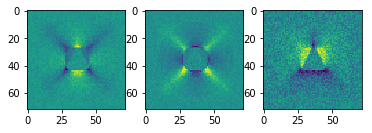

In [9]:
# Get weights matrix
w = model.get_weights()[0]
fig, ax = plt.subplots(ncols=3)
for i in range(0, 3):
    ax[i].imshow(w[:, i].reshape((d_sqrt, d_sqrt)))

# 4. A more complex classification problem
## Load the dataset and vizualize a few points

In [85]:
# Generate the dataset
[X_train, Y_train] = mp1.generate_dataset_classification(300, 20, True)

# Encode the label in "One hot encoding"
Y_train_onehot = (np_utils.to_categorical(Y_train)).astype(int)

# Get dimensions
d = X_train.shape[1]
ntrain = X_train.shape[0]
# Sizes of non flattened images
d_sqrt = int(np.sqrt(d))

# Put Xs back to 2D
X_train2D = np.array([x.reshape((d_sqrt, d_sqrt)) for x in X_train])

# Reshape to match the convolutionnal network input format
X_train2D = X_train2D.reshape(ntrain, d_sqrt, d_sqrt, 1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


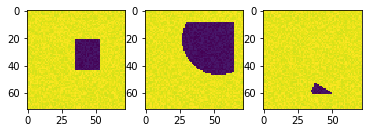

In [86]:
# Plot a data point for each class
rect = X_train2D[np.argwhere(Y_train == 0)[0][0], :, :, 0]
circ = X_train2D[np.argwhere(Y_train == 1)[0][0], :, :, 0]
tria = X_train2D[np.argwhere(Y_train == 2)[0][0], :, :, 0]
fig, ax = plt.subplots(ncols=3)
ax[0].imshow(rect)
ax[1].imshow(circ)
ax[2].imshow(tria)

## Convolutionnal neural network
###  Architecture

In [92]:
# Create empty sequential model
model = Sequential()

# Add convolutionnal layer with relu activation function
model.add(Conv2D(filters=16, kernel_size=5, input_shape=(d_sqrt, d_sqrt, 1)))
model.add(Activation("relu"))

# Add mean pooling layer with relu activation function
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Activation("relu"))

# Add flatten layer to go back to 1D
model.add(Flatten())

# Add output dense layer with softmax activation
model.add(Dense(units=3))
model.add(Activation("softmax"))

### Optimization

In [93]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


# Fit the model with adam optimizer
epochs = 40
batch_size = 32
history = model.fit(X_train2D, Y_train_onehot, epochs=epochs, batch_size=batch_size)

Epoch 1/40
300/300 [==============================] - 1s 2ms/step - loss: 1.3345 - acc: 0.3867
Epoch 2/40
300/300 [==============================] - 1s 2ms/step - loss: 1.1036 - acc: 0.4400
Epoch 3/40
300/300 [==============================] - 0s 1ms/step - loss: 0.9617 - acc: 0.6167
Epoch 4/40
300/300 [==============================] - 0s 1ms/step - loss: 0.8998 - acc: 0.5733
Epoch 5/40
300/300 [==============================] - 0s 2ms/step - loss: 0.8005 - acc: 0.7000
Epoch 6/40
300/300 [==============================] - 0s 2ms/step - loss: 0.7368 - acc: 0.7600
Epoch 7/40
300/300 [==============================] - 0s 2ms/step - loss: 0.6875 - acc: 0.7267
Epoch 8/40
300/300 [==============================] - 0s 1ms/step - loss: 0.6391 - acc: 0.7600
Epoch 9/40
300/300 [==============================] - 0s 1ms/step - loss: 0.5960 - acc: 0.7967
Epoch 10/40
300/300 [==============================] - 0s 2ms/step - loss: 0.5619 - acc: 0.8067
Epoch 11/40
300/300 [============================